# Linear Regression in StatsModels - Lab

## Introduction

It's time to apply the StatsModels skills from the previous lesson! In this lab , you'll explore a slightly more complex example to study the impact of spending on different advertising channels on total sales.

## Objectives

You will be able to:

* Perform a linear regression using StatsModels
* Evaluate a linear regression model using StatsModels
* Interpret linear regression coefficients using StatsModels

## Let's Get Started

In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

The columns in this dataset are:

1. `sales`: the number of widgets sold (in thousands)
2. `tv`: the amount of money (in thousands of dollars) spent on TV ads
3. `radio`: the amount of money (in thousands of dollars) spent on radio ads
4. `newspaper`: the amount of money (in thousands of dollars) spent on newspaper ads

## Step 1: Exploratory Data Analysis

In [2]:
# Load necessary libraries and import the data
import pandas as pd
# import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

df = pd.read_csv('data/advertising.csv',index_col=0)
df

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
# Check the columns and first few rows
print(df.columns)
df.head()


Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Generate summary statistics for data with .describe()
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Based on what you have seen so far, describe the contents of this dataset. Remember that our business problem is asking us to build a model that predicts sales.

In [5]:
# amount of money spent on advertising using tv,radio and newspapers as well as a target variable,sales
#The count for each is 200 which means we do not have any missing data.
#looking at ea values, it appears that spending on TV is highest and spedning on radio is the lowest aligning with
#output from head()

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Every record in our dataset shows the advertising budget spend on TV, newspaper, and radio campaigns as well as a target variable, sales.

The count for each is 200, which means that we do not have any missing data.

Looking at the mean values, it appears that spending on TV is highest, and spending on radio is lowest. This aligns with what we see in the output from `head()`.
    
</details>

Now, use scatter plots to plot each predictor (TV, radio, newspaper) against the target variable.

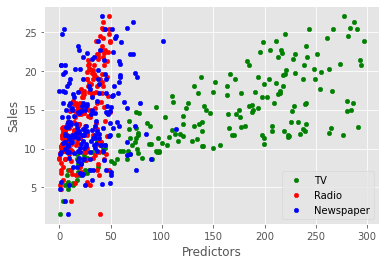

In [6]:
# Visualize the relationship between the preditors and the target using scatter plots
fig, ax = plt.subplots()
df.plot.scatter('TV','sales', c='g',label='TV',ax=ax)
df.plot.scatter('radio','sales',c='r',label='Radio',ax=ax)
df.plot.scatter('newspaper','sales',c='b',label='Newspaper',ax=ax)
ax.set(xlabel='Predictors',ylabel='Sales')
ax.legend();

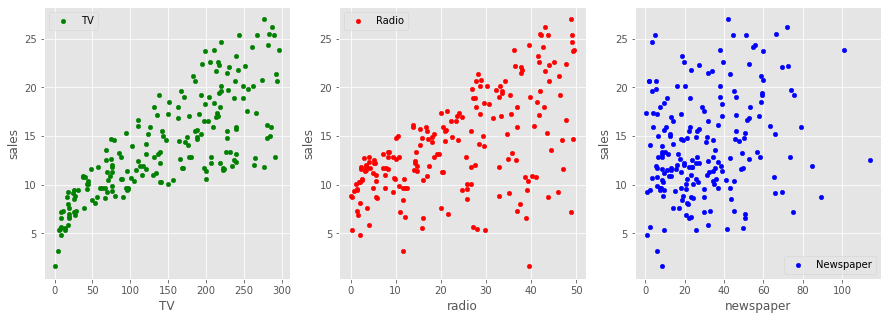

In [7]:
#looks bettter
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
df.plot.scatter('TV','sales', c='g',label='TV',ax = ax[0])
df.plot.scatter('radio','sales',c='r',label='Radio',ax = ax[1])
df.plot.scatter('newspaper','sales',c='b',label='Newspaper',ax = ax[2]);

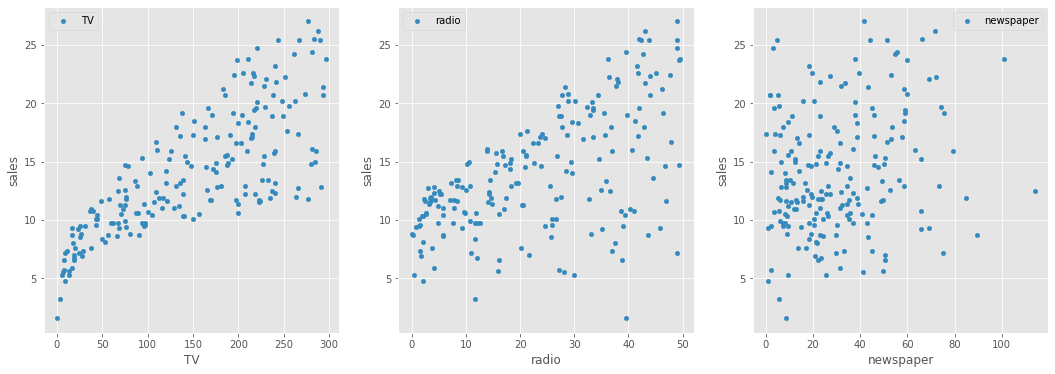

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
for idx, channel in enumerate(['TV', 'radio', 'newspaper']):
    df.plot.scatter(x=channel,y='sales',ax=ax[idx],label=channel)
    ax[idx].legend()

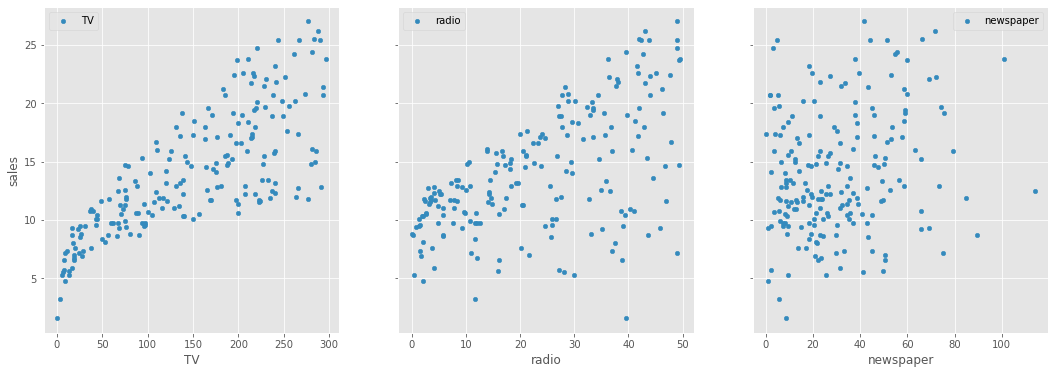

In [9]:
# Teachers code
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['TV', 'radio', 'newspaper']):
    df.plot(kind='scatter', x=channel, y='sales', ax=axs[idx], label=channel)
    axs[idx].legend()

Does there appear to be a linear relationship between these predictors and the target?

In [10]:
# Record your observations on linearity here 
#TV seems to be a good predictor because it has the most linear relationship with sales
#Radio also seems to have a linear r/ship, but there is more variance that with TV.We would expect a model
# using radio to be able to predict the target, but not as well as model using TV
# newspaper has the least linear -looking relationship.There is a lot of variance as well.its not clear from this
#whether a model using newspaper would be able to predict the target
   
import numpy as np
np.corrcoef(df['TV'],df['sales'])[0,1] #0.78
np.corrcoef(df['radio'],df['sales'])[0,1] #0.57
np.corrcoef(df['newspaper'],df['sales'])[0,1] #0.22


0.22829902637616534

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

`TV` seems to be a good predictor because it has the most linear relationship with sales.

`radio` also seems to have a linear relationship, but there is more variance than with `TV`. We would expect a model using `radio` to be able to predict the target, but not as well as a model using `TV`.

`newspaper` has the least linear-looking relationship. There is a lot of variance as well. It's not clear from this plot whether a model using `newspaper` would be able to predict the target.
    
</details>

## Step 2: Run a Simple Linear Regression with `TV` as the Predictor

As the analysis above indicates, `TV` looks like it has the strongest relationship with `sales`. Let's attempt to quantify that using linear regression.

In [11]:
# Import libraries
import statsmodels.api as sm
# Determine X and y values
X = df[['TV']]
y = df['sales']
# Create an OLS model
model = sm.OLS(endog=y, exog= sm.add_constant(X))
model


c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [12]:
# Get model results
results = model.fit()

# Display results summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        11:47:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

## Step 3: Evaluate and Interpret Results from Step 2

How does this model perform overall? What do the coefficients say about the relationship between the variables?

In [13]:
# Your answer here
#our model is statisctically significant with a p-value denoted by  prob(F-statistic)  which is below the standard alpha of 0.05
#From R2 our models explains abt 61.2 % of the variance in Sales, depedent variable
#model parameters- for a tv advert cost of 0 our model would predict sales of 7.03k(7030$).An icrease of 1k tv adverts is associated with an increase of about 0.0475k(47.5$) in sales
#model parameter p-values- both of our model parameters (coeefient for TV and intercept) are statisctically significant with
#p-values below the standard alpha of 0.05
#model parameter CI (our 61.2% CI for the intercpet is about 6.13 to about 7.935, our 61.2% CI for the coefficeint of Tv is about 0.0042 to about 0.053)

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Overall the model and coefficients are **statistically significant**, with all p-values well below a standard alpha of 0.05.

The R-squared value is about 0.61 i.e. **61% of the variance in the target variable can be explained by TV spending**.

The intercept is about 7.0, meaning that if we spent 0 on TV, we would expect sales of about 7k widgets (the units of `sales` are in thousands of widgets).

The `TV` coefficient is about 0.05, meaning that **for each additional &dollar;1k spent on TV (the units of `TV` are in thousands of dollars), we would expect to sell an additional 50 widgets**. (More precisely, 47.5 widgets.)

Note that all of these coefficients represent associations rather than causation. It's possible that better sales are what leads to more TV spending! Either way, `TV` seems to have a strong relationship with `sales`.

</details>

## Step 4: Visualize Model with `TV` as Predictor

Create at least one visualization that shows the prediction line against a scatter plot of `TV` vs. sales, as well as at least one visualization that shows the residuals.

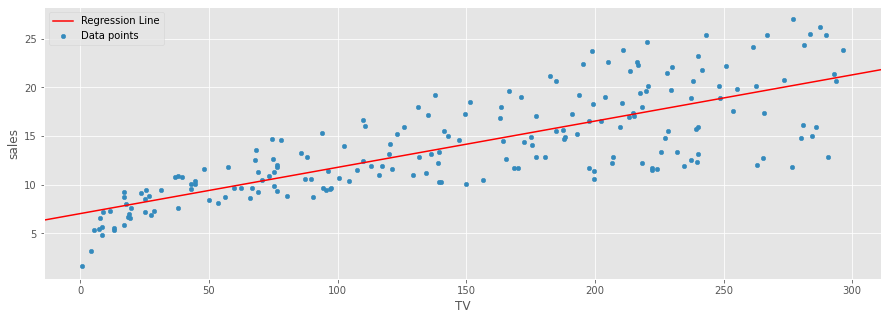

In [14]:
# Plot the model fit (scatter plot and regression line)
fig, ax = plt.subplots(figsize=(15,5))
df.plot.scatter('TV','sales',label='Data points',ax=ax)
sm.graphics.abline_plot(model_results=results,c='r',label = 'Regression Line', ax=ax)
ax.legend();


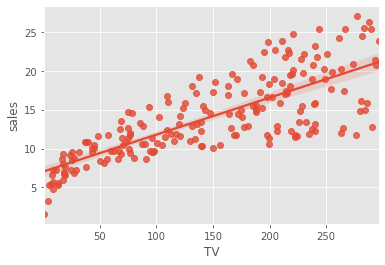

In [15]:
sns.regplot(x='TV',y='sales',data=df);

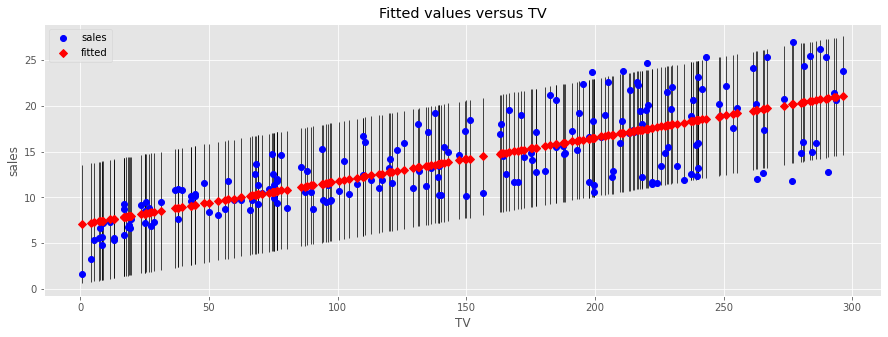

In [16]:
#plot_fit version of model fit
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(results,'TV',ax=ax);

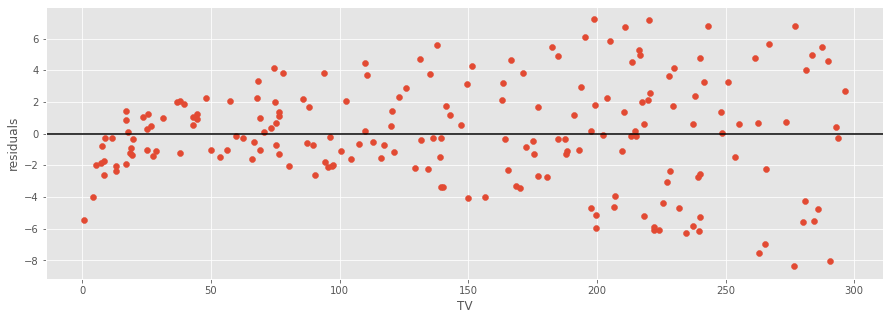

In [17]:
# Plot the model residuals
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(df['TV'],results.resid)
ax.axhline(y=0,c='k')
ax.set_xlabel("TV")
ax.set_ylabel("residuals");


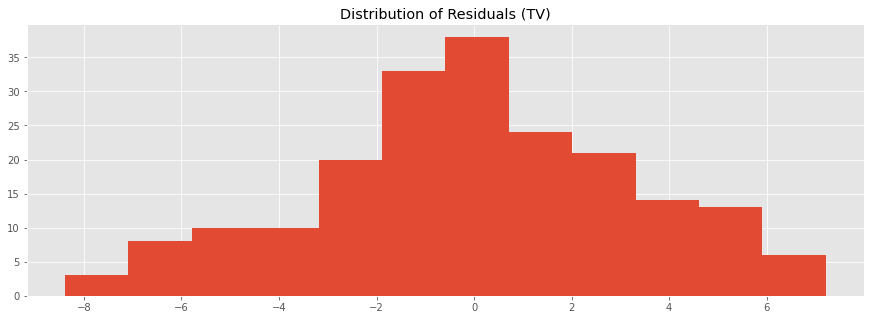

In [18]:
#plotting residual histogram
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(results.resid,bins='auto')
ax.set_title("Distribution of Residuals (TV)");

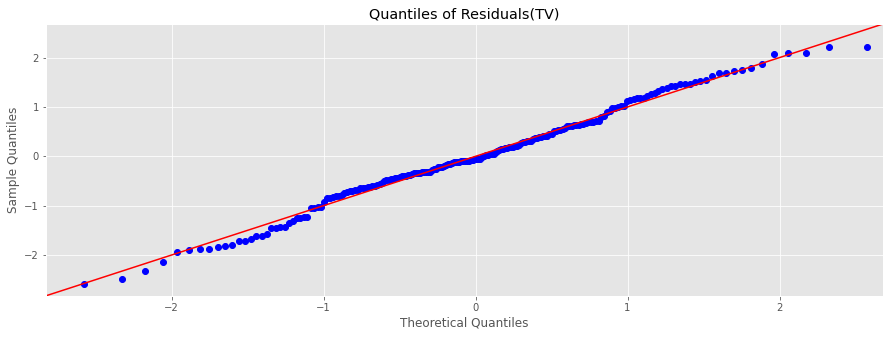

In [19]:
#plotting residual Q-Q plot
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid,dist=stats.norm,line='45',fit=True,ax=ax)
ax.set_title('Quantiles of Residuals(TV)');



## Step 5: Repeat Steps 2-4 with `radio` as Predictor

Compare and contrast the model performance, coefficient value, etc. The goal is to answer the business question described above.

In [20]:
# Run model
X_radio = df[['radio']]
model_radio = sm.OLS(endog=y, exog=sm.add_constant(X_radio))

#fit the model
radio_results = model_radio.fit()
# Display results
print(radio_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           4.35e-19
Time:                        11:47:56   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


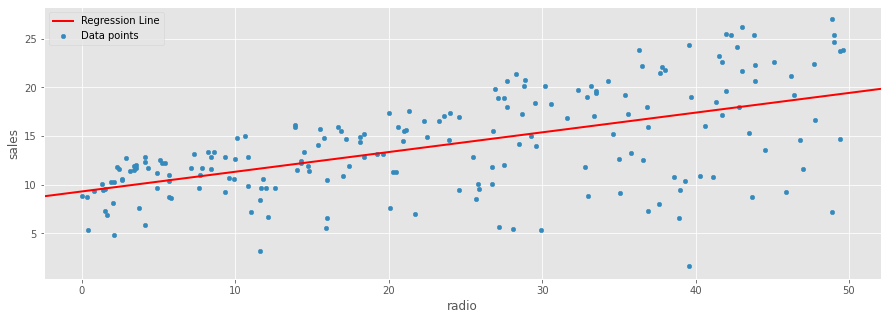

In [21]:
# Visualize model fit
#abline_plot version of model fit
fig, ax = plt.subplots(figsize=(15,5))
df.plot.scatter(x='radio',y='sales',label='Data points',ax=ax)
sm.graphics.abline_plot(model_results=radio_results,ax=ax,c='r',label='Regression Line',lw=2)
ax.legend();

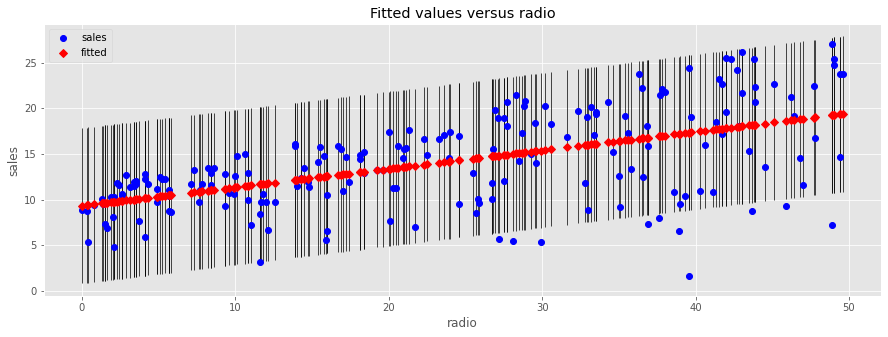

In [22]:
#plot_fit version of model fit
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(radio_results,'radio',ax=ax);

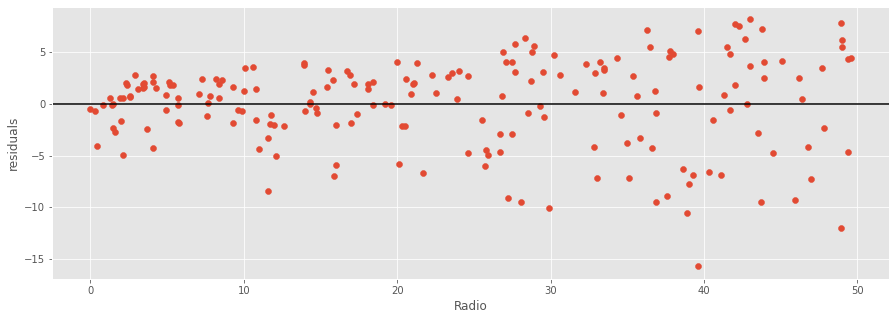

In [23]:
# Visualize residuals
#plotting residuals vs radio
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(df['radio'],radio_results.resid)
ax.axhline(y=0,c='k')
ax.set_xlabel("Radio")
ax.set_ylabel("residuals");


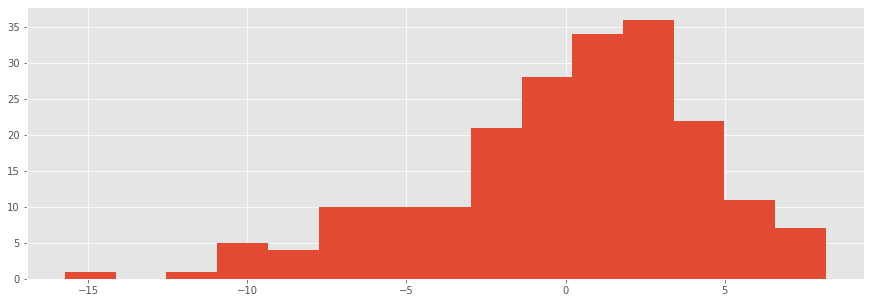

In [24]:
#plotting residual histogram
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(radio_results.resid,bins='auto');

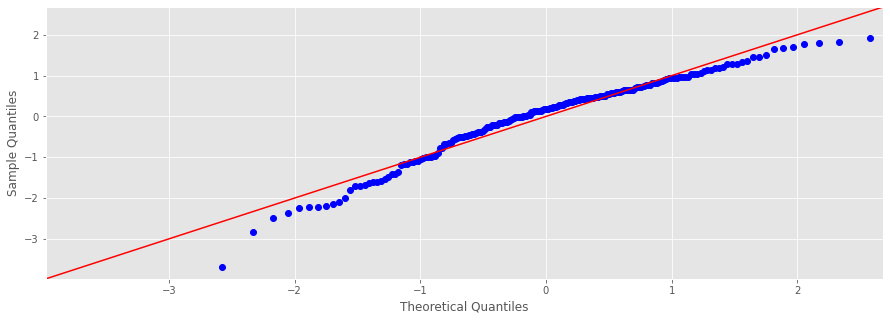

In [25]:
#plotting residual Q-Q plot
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(radio_results.resid,dist=stats.norm,line='45',fit=True,ax=ax);

#### Your interpretation here
Overall the model and the coeeficients are statistically significant, with all p-values well below standard alpha of 0.05

R2 value is about 0.332 i.e 33.2% of the  variance in the target variable can be explained by TV spending

The intercept is about 9.31 meaning that if we spent 0 on Radio we would expect sales of about 9.31k widgets(the units of sales are in thousands of widgets).

The radio coefficient is about 0.2025 meaning for each additional 1k spent on radio we would expect to sell additonal  0.2025(202.5 gadets)

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Same as with `TV`, the model using `radio` to predict `sales` as well as its parameters are **statistically significant** (p-values well below 0.05).

However, this model explains less of the variance. It only **explains about 33% of the variance in `sales`**, compared to about 61% explained by `TV`. If our main focus is the percentage of variance explained, this is a worse model than the `TV` model.

On the other hand, the coefficient for `radio` is much higher. **An increase of &dollar;1k in radio spending is associated with an increase of sales of about 200 widgets!** This is roughly 4x the increase of widget sales that we see for `TV`.

Visualizing this model, it doesn't look much different from the `TV` model.
    
So, how should we answer the business question? Realistically, you would need to return to your stakeholders to get a better understanding of what they are looking for. Do they care more about the variable that explains more variance, or do they care more about where an extra &dollar;1k of advertising spending is likely to make the most difference?

</details>

## Step 6: Repeat Steps 2-4 with `newspaper` as Predictor

Once again, use this information to compare and contrast.

In [26]:
# Run model
X_newspaper = df[['newspaper']]
model_newspaper = sm.OLS(endog=y,exog=sm.add_constant(X_newspaper))
#fit model
results_newspaper = model_newspaper.fit()
# Display results
print(results_newspaper.summary())



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 17 Oct 2024   Prob (F-statistic):            0.00115
Time:                        11:47:58   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


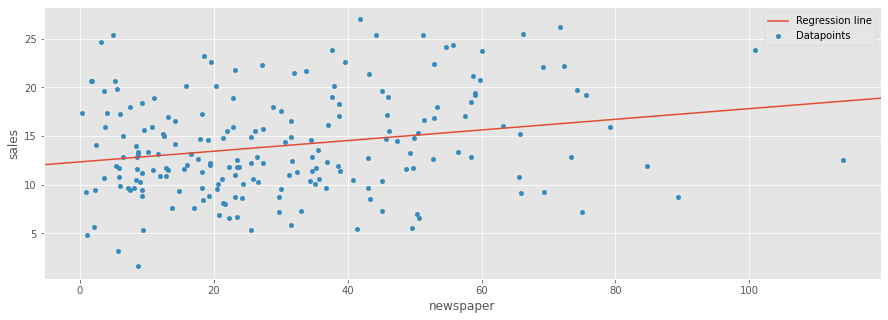

In [27]:
# Visualize model fit
#sing abline_plot
fig,ax = plt.subplots(figsize=(15,5))
df.plot('newspaper','sales',ax=ax,label='Datapoints',kind='scatter')
sm.graphics.abline_plot(model_results=results_newspaper,ax=ax,label='Regression line')
ax.legend();

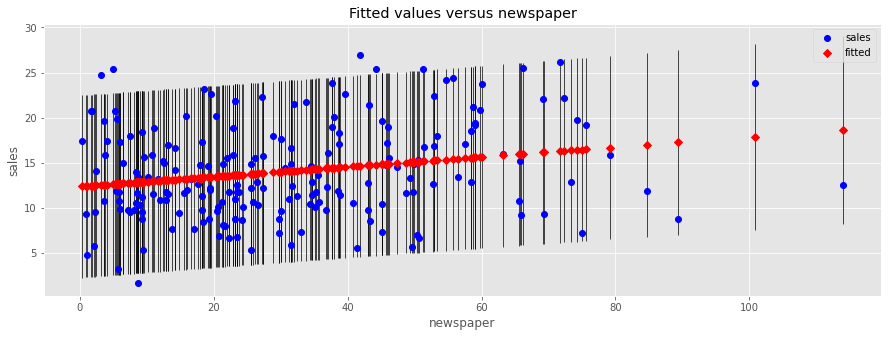

In [28]:
#using plot_fit
fig,ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(results_newspaper,'newspaper',ax=ax);

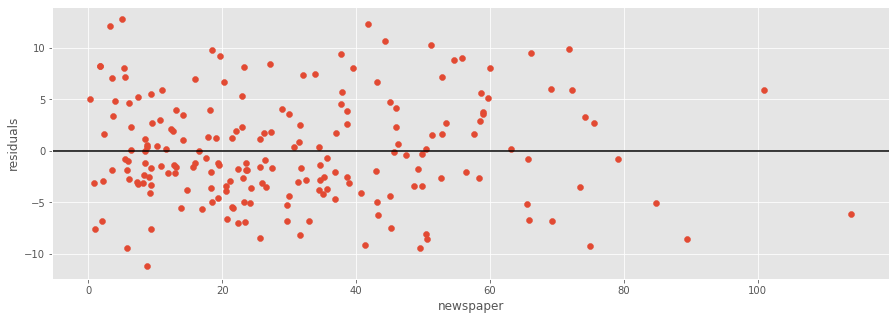

In [29]:
# Visualize residuals
fig,ax = plt.subplots(figsize=(15,5))
ax.scatter(df['newspaper'],results_newspaper.resid)
ax.axhline(y=0,c='k')
ax.set_xlabel("newspaper")
ax.set_ylabel("residuals");

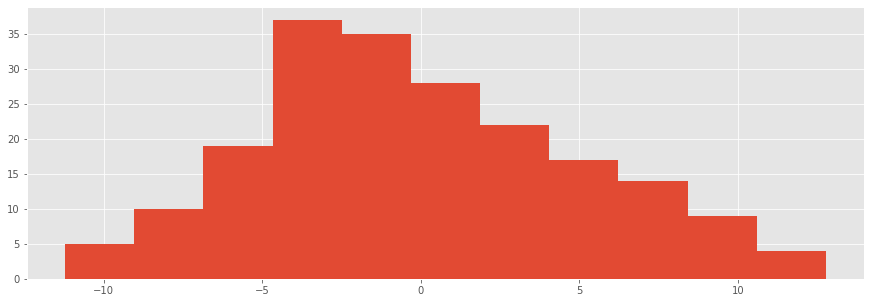

In [30]:
#plot residual histogram
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(results_newspaper.resid,bins='auto');

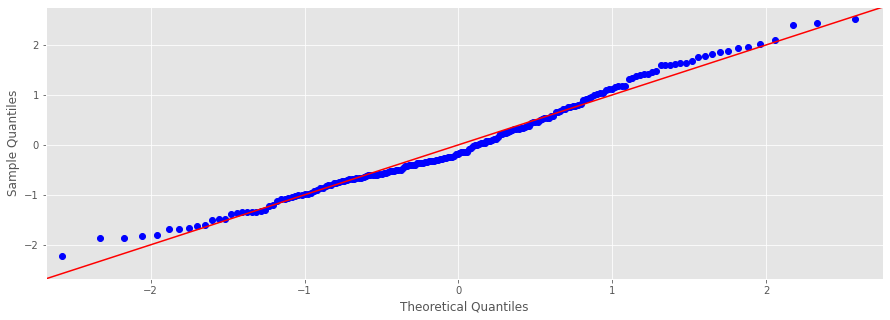

In [31]:
#qqplot
fig,ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results_newspaper.resid,dist=stats.norm,line='45',fit=True,ax=ax);

In [32]:
# Your interpretation here

### Your interpretation here
same as with Tv and radio the model using newpaper to predict sales as well as its parameters are statistically significant (p-values below the standard alpha of 0.05)

However this model explains less of the variance.it only explains abt 5% of the variance in sales compared to the 61% in Tv and 33% in radio.

 on the other hand the coeeficient of newspaper is much higher than tv and radio i.e with 0 newspaper adver we have sales of 12.3514k which is equal to 12351$. An increase in 1k $ in newspaper spending is associated with an increase of sales of about 54.7 gadgets which is much more than TV.
 
 To stakeholders do they care more about variable that explains more variance of do they care more about where an extras $1k of adveritsing spending is likely to make the most difference

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Technically our model and coefficients are **still statistically significant** at an alpha of 0.05, but the p-values are much higher. For both the F-statistic (overall model significance) and the `newspaper` coefficient, our p-values are about 0.001, meaning that there is about a 0.1% chance that a variable with _no linear relationship_ would produce these statistics. That is a pretty small false positive rate, so we'll consider the model to be statistically significant and move on to interpreting the other results.

The R-Squared here is the smallest we have seen yet: 0.05. This means that **the model explains about 5% of the variance in `sales`**. 5% is well below both the `radio` model (33%) and the `TV` model (61%).

The coefficient is also small, though similar to the `TV` coefficient. **An increase of &dollar;1k in newspaper spending is associated with about 50 additional widget sales** (more precisely, about 54.7). This is still much less than the 200-widget increase associated with &dollar;1k of additional `radio` spending.

Visualizing this model, the best-fit line is clearly not a strong predictor. On the other hand, the residuals exhibit _homoscedasticity_, meaning that the distribution of the residuals doesn't vary much based on the value of `newspaper`. This contrasts with the `radio` and `TV` residuals which exhibit a "cone" shape, where the errors are larger as the x-axis increases. Homoscedasticity of residuals is a good thing, which we will describe more in depth when we discuss regression assumptions.

Once again, how should we answer the business question? Regardless of the framing, it is unlikely that `newspaper` is the answer that your stakeholders want. This model has neither the highest R-Squared nor the highest coefficient.

</details>

## Summary

In this lab, you ran a complete regression analysis with a simple dataset. You used StatsModels to perform linear regression and evaluated your models using statistical metrics as well as visualizations. You also reached a conclusion about how you would answer a business question using linear regression.